<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/03_Computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Get the data

In [6]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zipref = zipfile.ZipFile('pizza_steak.zip')
zipref.extractall()
zipref.close()

--2025-10-16 04:02:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  32.7MB/s    in 3.2s    

2025-10-16 04:02:49 (32.7 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

In [8]:
# list the folders
!ls pizza_steak

test  train


In [11]:
!ls pizza_steak/train

pizza  steak


In [22]:
import os
# Walk through pizza_steak and list number of file
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/pizza
There are 0 directories and 750 files in pizza_steak/train/steak
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/steak


In [25]:
# Another way to find out howmany images are in a file
num_steack_train_images = os.listdir('pizza_steak/train/steak')
len(num_steack_train_images)

750

## Get the class name

In [30]:
# Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class names for sub directories

In [31]:
data_dir, class_names

(PosixPath('pizza_steak/train'), array(['pizza', 'steak'], dtype='<U5'))

## Let's visualize our images


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import random

812349.jpg
(512, 512, 3)


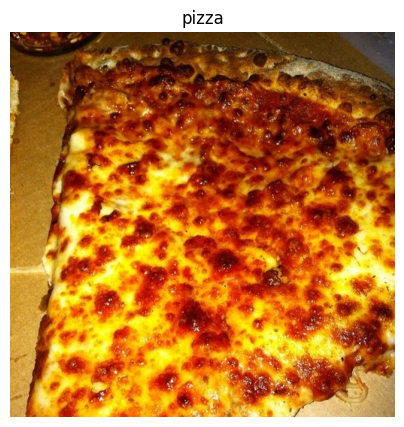

In [76]:
# View the random image
# Setup the target directory
target_folder = 'pizza_steak/train/'+"pizza"

# Get the random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Reading image and plot it
img = npimg.imread(target_folder + "/" + random_image[0])
# Plot ranodm image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('pizza')
plt.axis(False)
print(random_image[0])
print(img.shape)

array([[[ 34,   7,  12],
        [ 34,   6,   5],
        [ 53,  19,   7],
        ...,
        [ 52,  50,  53],
        [ 53,  48,  52],
        [ 52,  47,  51]],

       [[ 28,   1,  10],
        [ 27,   0,   2],
        [ 45,  12,   3],
        ...,
        [ 54,  52,  55],
        [ 55,  50,  54],
        [ 54,  49,  53]],

       [[ 28,   1,  18],
        [ 33,   3,  13],
        [ 23,   0,   0],
        ...,
        [ 55,  53,  56],
        [ 56,  51,  55],
        [ 55,  50,  54]],

       ...,

       [[211, 157,  67],
        [206, 152,  62],
        [199, 145,  55],
        ...,
        [152, 122,  68],
        [158, 128,  74],
        [163, 133,  79]],

       [[206, 153,  61],
        [210, 157,  65],
        [198, 144,  54],
        ...,
        [157, 127,  73],
        [157, 128,  72],
        [158, 129,  73]],

       [[198, 145,  53],
        [215, 162,  70],
        [196, 142,  52],
        ...,
        [159, 129,  75],
        [160, 131,  75],
        [160, 131,  75]]], dtype=uint8)
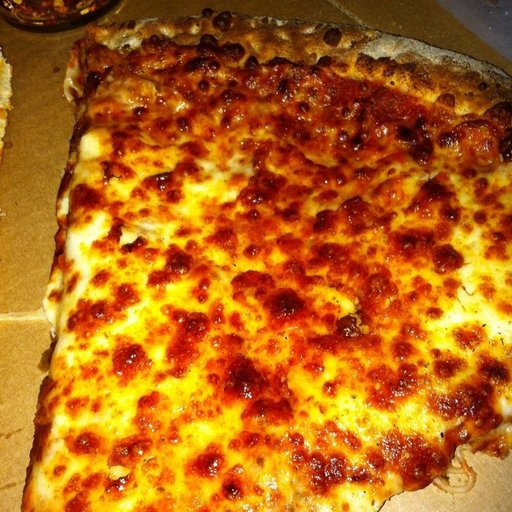

In [78]:
# The images we are imported and ploted are actually gaind arrays/tensors of different pixels values
img

Build a Convolutional Neural Network to find patterns in our images, more specifically we need way to:\
* Load our the images
* Preproces the images
* Build CNN to find patterns in the images
* Compile the CNN model
* Fit the CNN model on training datase


In [82]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seeds
tf.random.set_seed(42)

In [95]:

# 1. Load the images
# Setup paths to the data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# 2. Preprocess the images
# Preprocess the data - get all of the pixel value between 0 & 1
train_datagen = ImageDataGenerator(rescale=1/255. )
valid_datagen = ImageDataGenerator(rescale=1/255. )
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # we want all our image to the size of (224, 224)
                                               class_mode='binary', # that's telling train datagen  that we are importing data in binary format
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [126]:
train_data.classes, len(train_data ), 1500/32

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32), 47, 46.875)

Now we have 47 batches of 32 images and their labels in train_data \
**The reason I put things into batches is becaus that way it all can fit in memory of my computer chip**, if caluculate the pattern of 1500 images in one fit my computer might run out of memory

In [127]:
# 3. Build the CNN to find patterns of images
## 1. Create a CNN model the same as tiny vgg
m1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation=tf.keras.activations.relu,
                          input_shape=(224, 224, 3) # this is the input shape of the first layer is going to take 3 is the color chanel(RGB)
                           ),
    tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu ),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # we use binary classification
    ])
## 2. Compile the model
m1.compile(optimizer=tf.keras.optimizers.Adam(),
           loss=tf.keras.losses.BinaryCrossentropy(),
           metrics=['accuracy']
           )
## 3. Fit the model
h1 = m1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6082 - loss: 0.6285

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.6096 - loss: 0.6277 - val_accuracy: 0.7520 - val_loss: 0.4840
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.7526 - loss: 0.4997 - val_accuracy: 0.8320 - val_loss: 0.3773
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8080 - loss: 0.4145 - val_accuracy: 0.8360 - val_loss: 0.3678
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8228 - loss: 0.3795 - val_accuracy: 0.8540 - val_loss: 0.3466
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8431 - loss: 0.3722 - val_accuracy: 0.8640 - val_loss: 0.3200


<Axes: >

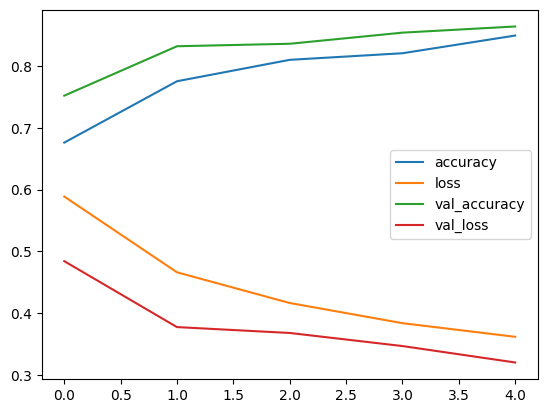

In [132]:
## 4. check the loss curve
import pandas as pd
pd.DataFrame(h1.history).plot()

In [128]:
m1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [133]:
# Save the model
m1.save('pizza_steak_CNN_classification.keras')